# MIS Project - Are US car manufacturers dying?



### Shahmir Javed, Gabriel Kinshuk, Zan Merrill, Aubrey Oh, Bhagya Puppala

In [85]:
import pandas as pd

In [86]:
cars_data = pd.read_csv("car_prices.csv")

### Removing columns not related to our analysis: vin, trim, seller, saledate  

In [87]:
cars_data = cars_data.drop(columns=['vin', 'seller', 'saledate', 'trim'])

cars_data

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Sedan,NaN,in,45.0,18255.0,silver,black,35300.0,33000.0
558833,2012,Ram,2500,Crew Cab,automatic,wa,5.0,54393.0,white,black,30200.0,30800.0
558834,2012,BMW,X5,SUV,automatic,ca,48.0,50561.0,black,black,29800.0,34000.0
558835,2015,Nissan,Altima,sedan,automatic,ga,38.0,16658.0,white,black,15100.0,11100.0


In [ ]:
make_to_country = {
    'kia': 'South Korea', 'bmw': 'Germany', 'volvo': 'Sweden', 'nissan': 'Japan', 'chevrolet': 'USA', 'audi': 'Germany', 'ford': 'USA', 'hyundai': 'South Korea', 'buick': 'USA', 'cadillac': 'USA', 'acura': 'Japan', 'lexus': 'Japan', 'infiniti': 'Japan', 'jeep': 'USA', 'mercedes-benz': 'Germany', 'mercedes': 'Germany', 'mitsubishi': 'Japan', 'mazda': 'Japan', 'mini': 'UK', 'land rover': 'UK', 'landrover': 'UK', 'lincoln': 'USA', 'jaguar': 'UK', 
    'volkswagen': 'Germany', 'vw': 'Germany', 'toyota': 'Japan', 'subaru': 'Japan', 'scion': 'Japan', 'porsche': 'Germany', 'dodge': 'USA', 'fiat': 'Italy', 'chrysler': 'USA', 'ferrari': 'Italy', 'honda': 'Japan', 'gmc': 'USA', 'gmc truck': 'USA', 'ram': 'USA', 'smart': 'Germany', 'bentley': 'UK', 'pontiac': 'USA', 'saturn': 'USA', 'maserati': 'Italy', 'mercury': 'USA', 'hummer': 'USA', 'saab': 'Sweden', 'suzuki': 'Japan', 'oldsmobile': 'USA', 'isuzu': 'Japan', 'dodge tk': 'USA', 'geo': 'USA', 'rolls-royce': 'UK', 
    'tesla': 'USA', 'airstream': 'USA', 'dot': 'Unknown', 'aston martin': 'UK', 'fisker': 'USA', 'lamborghini': 'Italy', 'lotus': 'UK', 'mazda tk': 'Japan', 'mercedes-b': 'Germany', 'chev truck': 'USA', 'ford tk': 'USA', 'plymouth': 'USA', 'ford truck': 'USA', 'hyundai tk': 'South Korea', 'chrysler': 'USA'
}


luxury_makes = {
    'acura', 'audi', 'bmw', 'cadillac', 'infiniti', 'jaguar', 'land rover',
    'lexus', 'lincoln', 'mercedes-benz', 'mercedes', 'porsche', 'volvo',
    'tesla', 'bentley', 'rolls-royce', 'maserati', 'ferrari', 'aston martin',
    'lamborghini', 'lotus'
}


# Add country column
cars_data['manufacturer_country'] = (
    cars_data['make']
    .str.lower()
    .str.strip()
    .map(make_to_country)
    .fillna('Unknown')
)

# Add luxury or standard
cars_data['luxury_or_standard'] = (
    cars_data['make']
    .str.lower()
    .str.strip()
    .isin(luxury_makes)
    .map({True: 'Luxury', False: 'Standard'})
)



### Remove rows with bad data

In [90]:
# Remove rows with invalid state and invalid color
cars_data = cars_data[~cars_data["state"].str.startswith('3')].reset_index(drop=True)

cars_data = cars_data.dropna(subset=['color'])
cars_data = cars_data[~cars_data["color"].str.match(r'^\d')].reset_index(drop=True)

### Save final data set

In [94]:
cars_data.to_csv('car_data.csv', index=False)

### Plot each numeric feature as a histogram and each categorical feature as a barplot. Only showed models with counts > 1000

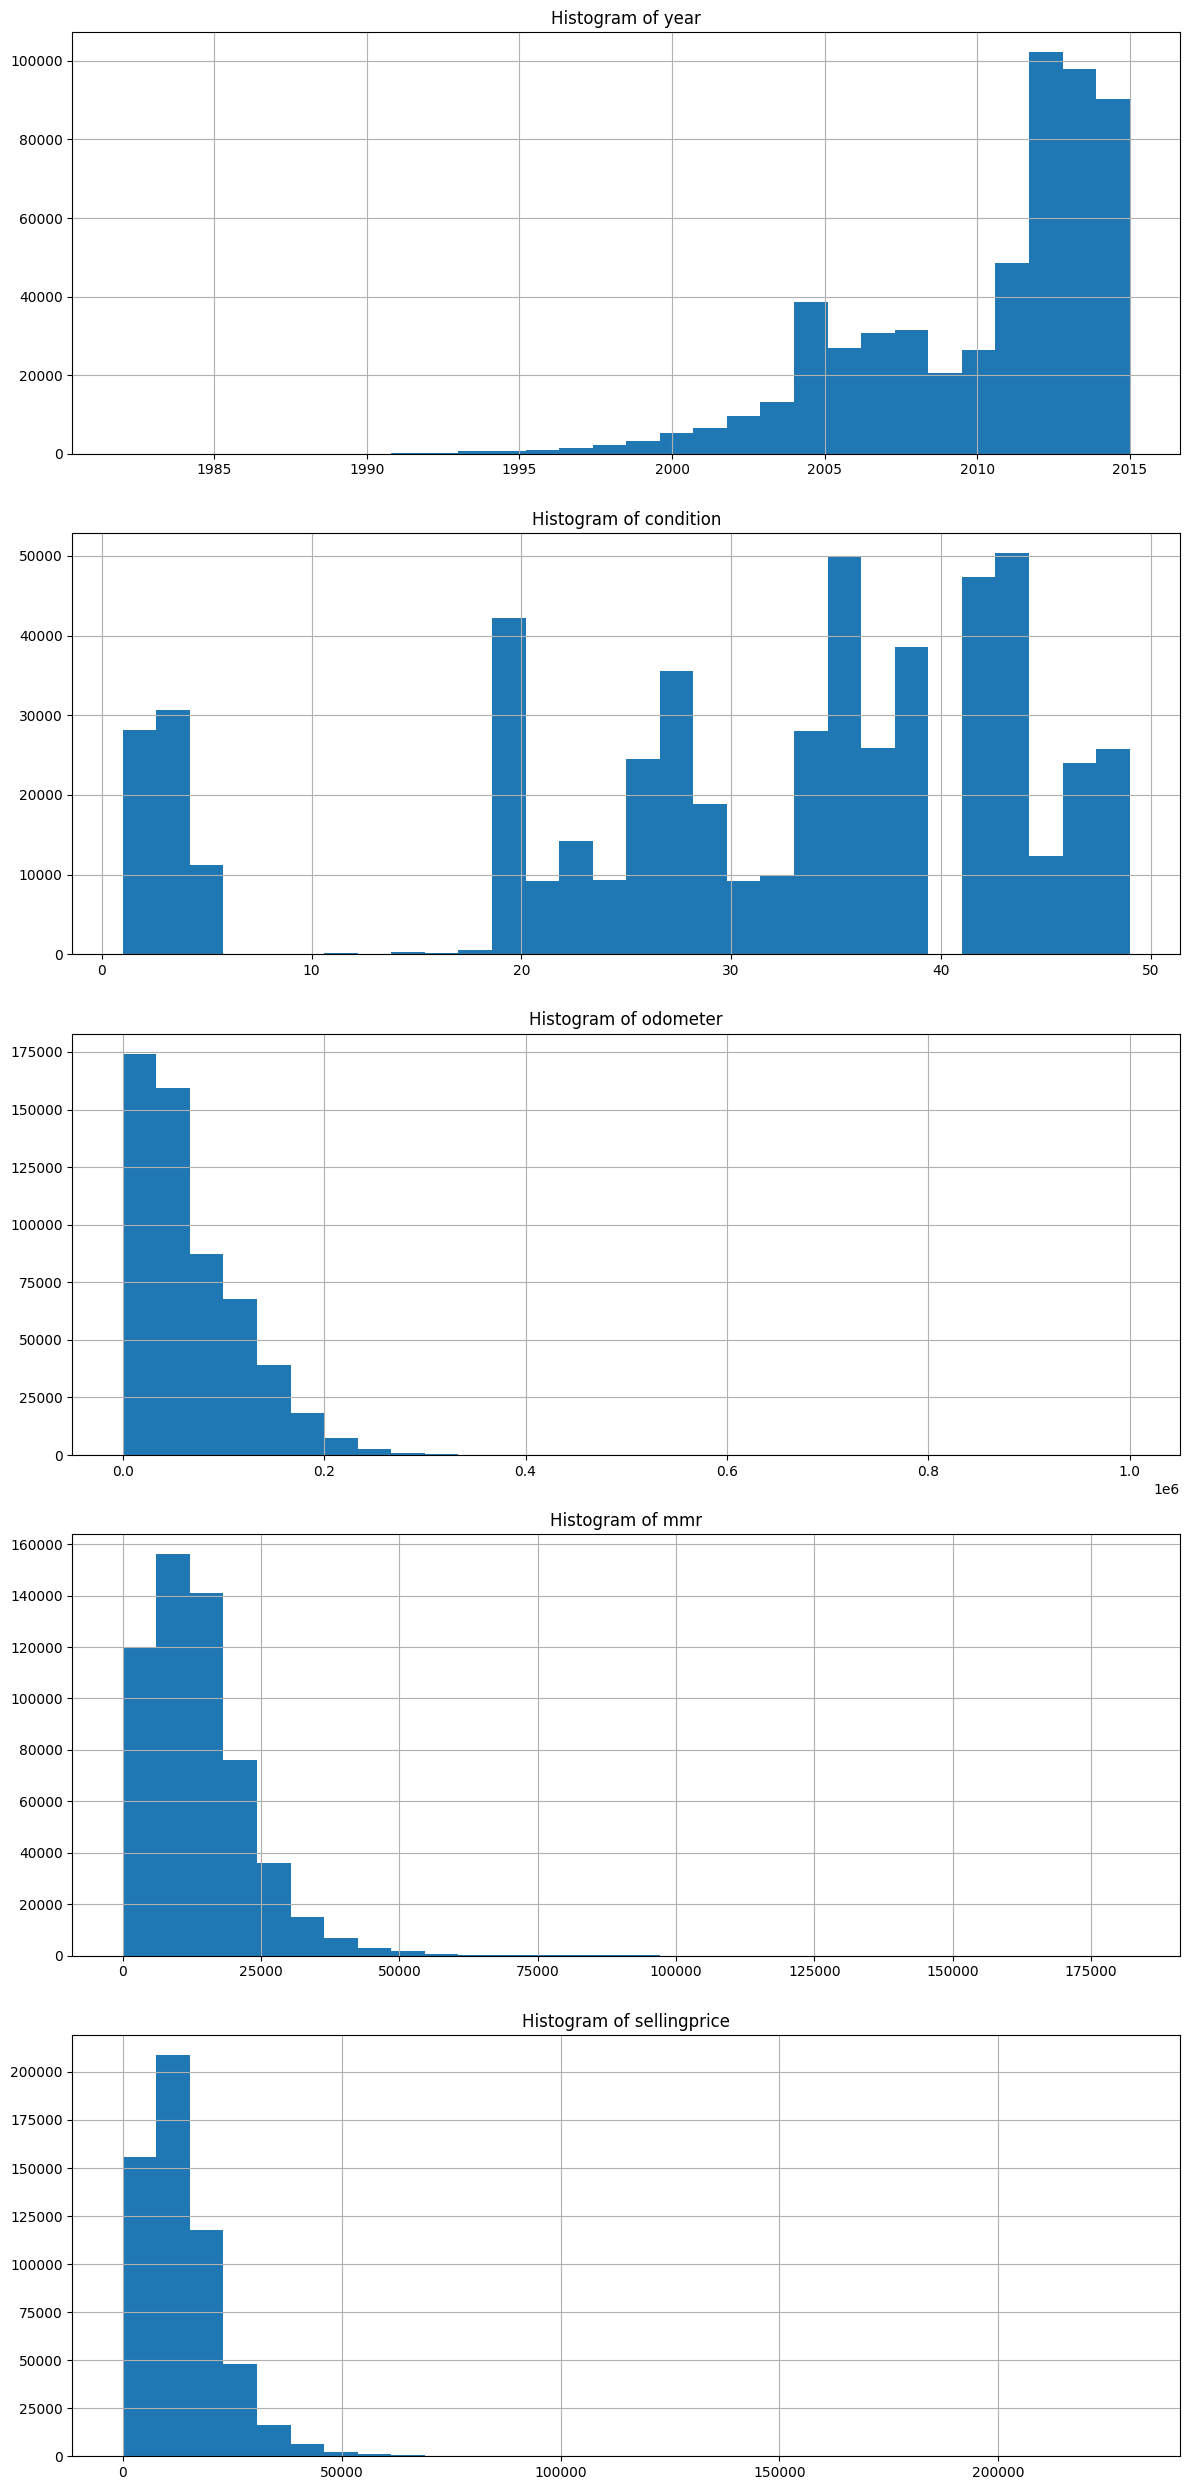

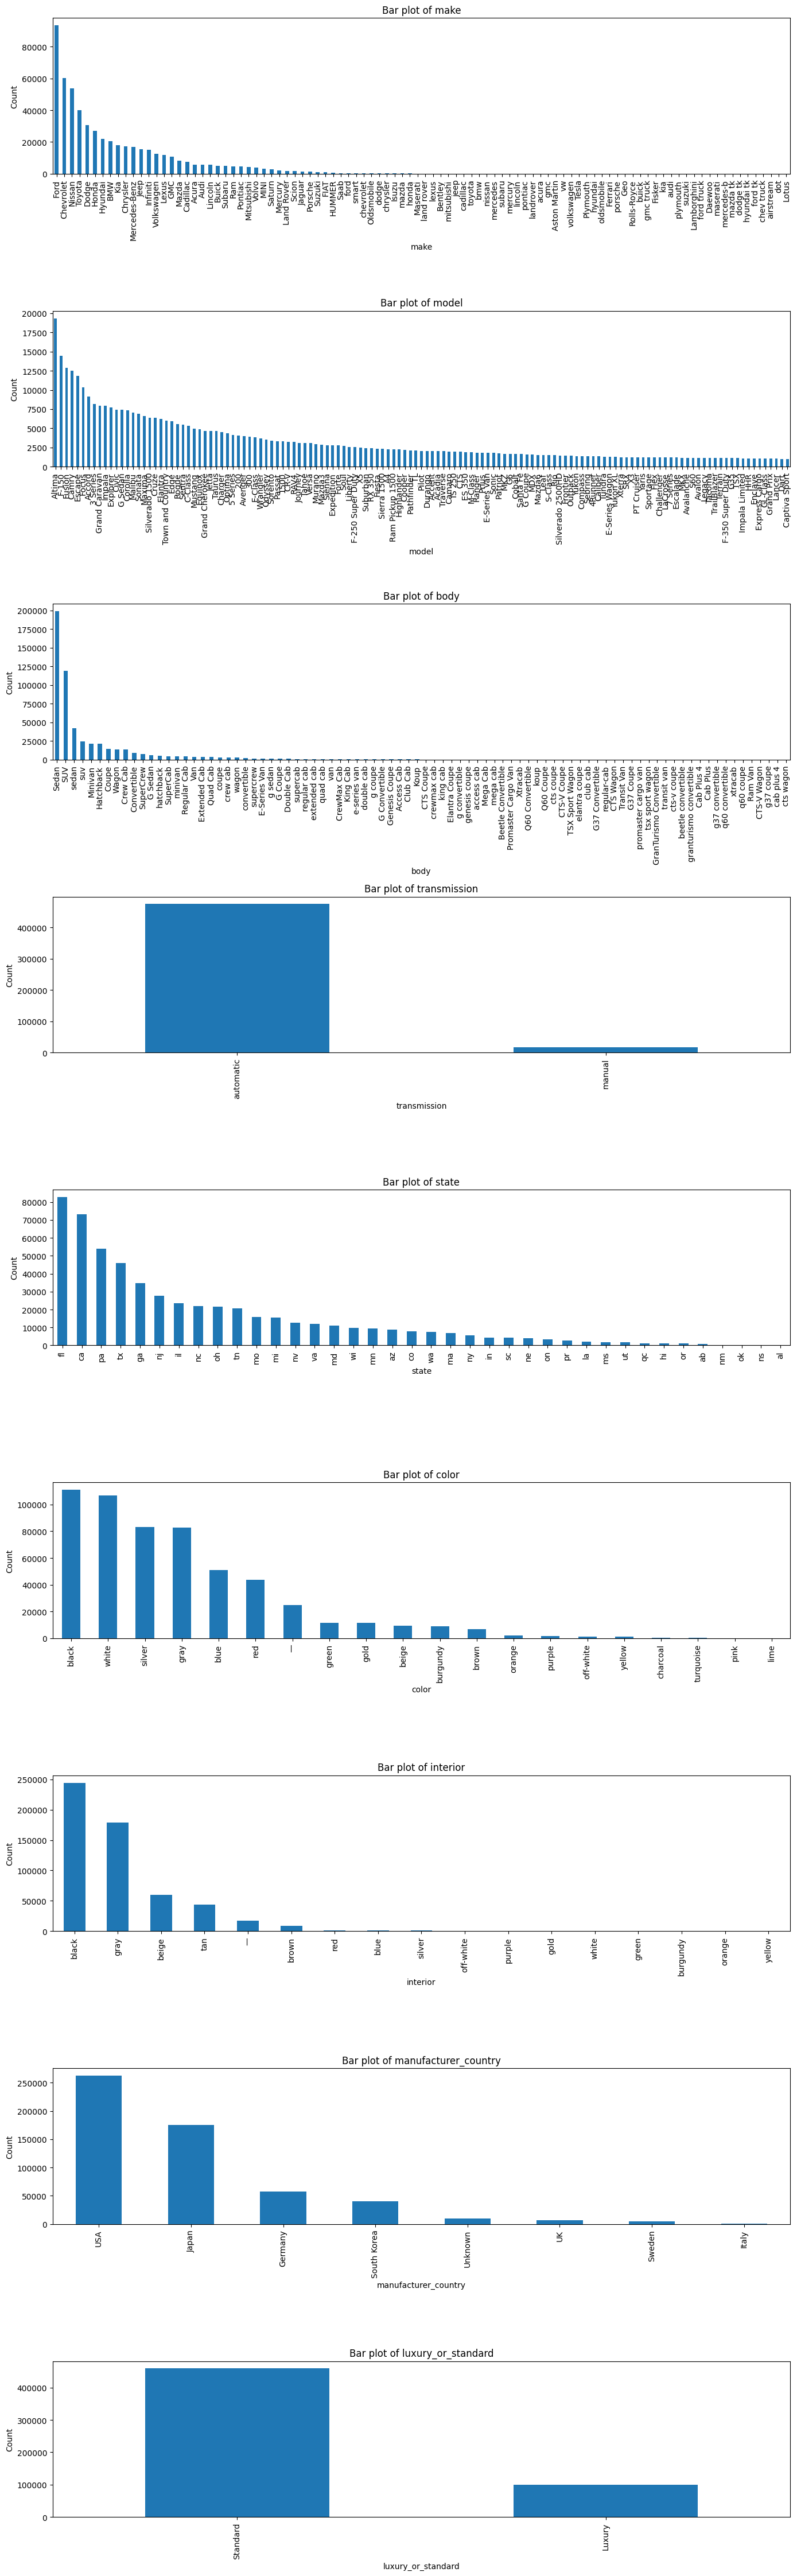

In [93]:
import matplotlib.pyplot as plt

# Numeric columns to histogram
numeric_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

# Categorical columns to bar plot (all columns except numeric)
categorical_cols = [col for col in cars_data.columns if col not in numeric_cols]

# Plot histograms for numeric columns with wider figures
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 5 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    ax = axes[i] if len(numeric_cols) > 1 else axes
    cars_data[col].hist(bins=30, ax=ax)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Plot bar plots for categorical columns with wider figures
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(14, 5 * len(categorical_cols)))
for i, col in enumerate(categorical_cols):
    ax = axes[i] if len(categorical_cols) > 1 else axes
    if col == 'model':
        # Only plot models with counts > 1000
        counts = cars_data[col].value_counts()
        counts = counts[counts > 1000]
        counts.plot(kind='bar', ax=ax)
    else:
        cars_data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Bar plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()
